![MSE Logo](https://moodle.msengineering.ch/pluginfile.php/1/core_admin/logo/0x150/1643104191/logo-mse.png)

# AnTeDe Lab 6: Applications of word2vec
## Objective
* Compare pre-trained word2vec models with models trained on your workstation, on word similarity and analogy tasks.	

## General instructions
* You can do the lab alone or in groups of two students.
* Please write the required code, but also reply explicitly to the questions, as Python comments in code cells or text in markdown cells. 
* To submit your practical work, please make sure all cells are executed, then save and zip the notebook, and submit it as homework on [Moodle](https://moodle.msengineering.ch/course/view.php?id=1869).
* Useful documentation: [section on word2vec in Gensim](https://radimrehurek.com/gensim/models/word2vec.html) as well as the [section on KeyedVectors in Gensim](https://radimrehurek.com/gensim/models/keyedvectors.html).
* Training can be done locally if you have at least 16 GB of memory (it takes minutes, not hours), or using [Google Colab](https://colab.research.google.com/).

## 1. Testing a word2vec model trained on Google News
a. Install Gensim the latest version of Gensim, for instance by running in your Conda environment `pip install --upgrade gensim`. 

In [1]:
# If you want to install from here, run the command ('!' indicates a command for the shell)
# !pip install --upgrade gensim

# Please run the following verification:
!pip show gensim

Name: gensim
Version: 4.3.2
Summary: Python framework for fast Vector Space Modelling
Home-page: https://radimrehurek.com/gensim/
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: C:\Users\Ruben\anaconda3\envs\TSM_AnTeDe\Lib\site-packages
Requires: numpy, scipy, smart-open
Required-by: 


In [2]:
import gensim, os
from gensim import downloader
# help(gensim.models.word2vec) # check if you are curious, but don't include output in the final notebook

In [3]:
# Download the model file from Gensim, for the first time only
# gensim.downloader.load("word2vec-google-news-300")
# We can assign the returned value to a model, but it is twice larger than needed.

b. Where is the model stored on your computer?  What is the size of the file?  Please store the absolute path in a variable called `path_to_model_file`, and use `os.path.getsize` to display the size converted in gigabytes with two decimals.

In [4]:
# Please write your Python code below and execute it.

path_to_model_file = "./gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz"
# The model is stored in the 'gensim-data' directory, in a file called 'word2vec-google-news-300.gz'.

# Get the size of the model file

model_size = os.path.getsize(path_to_model_file) / (1024 * 1024 * 1024)  # Co

print(f"Size of the model file: {model_size:.2f} GB")

Size of the model file: 1.62 GB


In [5]:
# Load the model into the notebook:
from gensim.models import KeyedVectors
wv_model = gensim.models.KeyedVectors.load_word2vec_format(path_to_model_file, binary=True)  # C bin format

c. What is the memory size of the process corresponding to this notebook?  Please simply write the value you obtain from any OS-specific utility that you wish to use for this purpose.

In [6]:
# Please write your size below.
import os
import psutil

process = psutil.Process(os.getpid())
memory_info = process.memory_info()
print(f"Memory usage: {memory_info.rss / (1024 * 1024)} MB")

Memory usage: 913.171875 MB


d. What is the size of the vocabulary of this model?  (I.e., how many words does it know?)

In [7]:
# Please write the Python code needed to display the vocabulary size and execute it.
print(f"Vocabulary size: {len(wv_model.key_to_index)}")

Vocabulary size: 3000000


e. Compare the vocabulary size with the number of words in an English dictionary.  How do you explain the difference?  Illustrate your explanation by showing at least 5 words which are in the model's vocabulary, and 2 that are not.

In [8]:
# Please write your Python code below and execute it.

#Compare the vocabulary size with the number of words in an English dictionary.  How do you explain the difference?  Illustrate your explanation by showing at least 5 words which are in the model's vocabulary, and 2 that are not."""

print("NUMBER OF WORDS IN AN ENGLISH DICTIONARY: 171476")
# SOURCE https://wordcounter.io/blog/how-many-words-are-in-the-english-language#:~:text=The%20English%20Dictionary&text=The%20Second%20Edition%20of%20the,Section%2C%20includes%20some%20470%2C000%20entries.

print("The vocabulary size of the model is 3000000, which is much larger than the number of words in an English dictionary. This is because the model is trained on a large corpus of text, which includes many different words, including proper nouns, acronyms, and other specialized terms. The model is designed to capture the meaning of words in context, so it needs to be able to represent a wide range of vocabulary.")

# Words in the model's vocabulary:
import random
random.seed(42)
words_in_vocab = random.sample(list(wv_model.key_to_index.keys()), 5)

print(f"5 Random words in the model's vocabulary: {words_in_vocab}\n")

# Now give me code which check ia word is in the vocalbulary or not
words_not_in_vocab = ['Ruben_Yannis', 'Yannis_Ruben']
for word in words_not_in_vocab:
    if word in wv_model.key_to_index:
        print(f"{word} is in the model's vocabulary")
    else:
        print(f"{word} is not in the model's vocabulary")

NUMBER OF WORDS IN AN ENGLISH DICTIONARY: 171476
The vocabulary size of the model is 3000000, which is much larger than the number of words in an English dictionary. This is because the model is trained on a large corpus of text, which includes many different words, including proper nouns, acronyms, and other specialized terms. The model is designed to capture the meaning of words in context, so it needs to be able to represent a wide range of vocabulary.
5 Random words in the model's vocabulary: ['espresso_martinis', 'wherefore', 'HARD', 'courtly_manners', "Hawai'ian"]

Ruben_Yannis is not in the model's vocabulary
Yannis_Ruben is not in the model's vocabulary


f. Determine the size of the vector space for this word2vec model, i.e. the dimensionality of the embedding space, using two methods: either using the vector of a word from the vocabulary, or directly using the shape of the model.

In [9]:
# Please write your Python code below and execute it.

# Method 1: Using the vector of a word from the vocabulary
vector_size_1 = len(wv_model['wherefore'])

# Method 2: Using the shape of the model
print(wv_model.vectors.shape)
#The shape of the model's vectors, which is (3000000, 300), meaning that there are 3,000,000 vectors in the model, each of which has a dimensionality of 300.
vector_size_2 = wv_model.vectors.shape[1]

print(f"Vector size using method 1: {vector_size_1}")
print(f"Vector size using method 2: {vector_size_2}")

(3000000, 300)
Vector size using method 1: 300
Vector size using method 2: 300


## 2. Using word2vec trained on Google News for word similarity
In this section, you are going to use word vectors to compute (cosine) similarity between words (use the [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) documentation).  You will experiment with three tasks: (a) rank a small number of word pairs by decreasing similarity; (b) test the model on the WordSimilarity-353 set; (c) test the model on the analogy task.

a. Sort the word pairs given below by decreasing similarity (i.e. most similar first).  Display also the similarity value found by word2vec, with 2 decimals.

In [10]:
test_pairs = [('car','automobile'), ('car', 'bike'), ('car', 'oil'), ('car', 'pedal'),  ('bike', 'pedal'), ('bike', 'bicycle'), ('oil', 'gas'), ('car', 'bus')]

# Please write your Python code below and execute it.
sorted_pairs = sorted([(pair, wv_model.similarity(pair[0], pair[1])) for pair in test_pairs], key=lambda x: x[1], reverse=True)

for pair, similarity in sorted_pairs:
    print(f"{pair}: {similarity:.2f}")


('bike', 'bicycle'): 0.85
('oil', 'gas'): 0.71
('car', 'bike'): 0.59
('car', 'automobile'): 0.58
('car', 'bus'): 0.47
('bike', 'pedal'): 0.47
('car', 'pedal'): 0.29
('car', 'oil'): 0.15


b. What are the five closest words to *car* in the whole vocabulary and their similarity values with *car*? 

In [11]:
wv_model.init_sims(replace=True) # run this to avoid memory footprint doubling with the first call 
# of "most_similar" (which caches unit vectors without replacement, unless told explicitly to do so).
# Will have the same effect on evaluate_word_analogies below.

# Please write your Python code below and execute it.
car_similarities = wv_model.most_similar('car', topn=5)
for word, similarity in car_similarities:
    print(f"{word}: {similarity:.2f}")

C:\Users\Ruben\AppData\Local\Temp\ipykernel_3432\3637424830.py:1: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  wv_model.init_sims(replace=True) # run this to avoid memory footprint doubling with the first call


vehicle: 0.78
cars: 0.74
SUV: 0.72
minivan: 0.69
truck: 0.67


c. Using the [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) documentation, evaluate the model on the WordSimilarity-353 task.  This compares similarities assigned to word pairs by word2vec with those assigned by humans.  Please display only the Pearson Correlation Coefficient, with two decimals. 

In [12]:
# Please write your Python code below and execute it.
from gensim.test.utils import datapath

# Load evaluation dataset of word similarities
word_similarity_dataset = datapath('wordsim353.tsv')

# Evaluate the model on the WordSimilarity-353 task
pearson_correlation = wv_model.evaluate_word_pairs(word_similarity_dataset)[0][0]

# Display the Pearson Correlation Coefficient with two decimals
print(f"Pearson Correlation Coefficient: {pearson_correlation:.2f}")

Pearson Correlation Coefficient: 0.62


d. Using the [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) documentation, evaluate the model on the Analogy Tasks (e.g., "*What is to Thailand what Athens is to Greece?*"). The task is specified in a data file called `questions-words.txt`.  Note: this takes around 5 minutes.  Store the output in a variable for future use.

In [13]:
# Please write your Python code below and execute it.
analogy_scores = wv_model.evaluate_word_analogies(datapath('questions-words.txt'))

In [14]:
# Store the output in a variable for future use in case jupyter crashes
import pickle

with open('analogy_scores.pkl', 'wb') as f:
    pickle.dump(analogy_scores, f)

In [15]:
import pickle

# Load the output from the variable
with open('analogy_scores.pkl', 'rb') as f:
    analogy_scores = pickle.load(f)

In [16]:
result = wv_model.most_similar(positive=['Thailand', 'Athens'], negative=['Greece'], topn=3)

print(result)

print(f"\n {result[0][0]} is to Thailand what Athens is to Greece")

[('Bangkok', 0.6855700016021729), ('Bangkok_Thailand', 0.5587929487228394), ('Thai', 0.5496402978897095)]

 Bangkok is to Thailand what Athens is to Greece


e. Using the output above, please display the accuracy (number of correctly solved analogies), and then pick four categories of your choice, and display for each of them the accuracy, a correctly-solved analogy, and an incorrectly-solved one.  How many analogy tasks are there in total?

In [17]:
# accuracy for each category and for total 
for section in analogy_scores[1]:
    print(f"{section['section']}: {len(section['correct'])/(len(section['correct']) + len(section['incorrect'])) * 100:.2f}%")

capital-common-countries: 83.20%
capital-world: 81.32%
currency: 28.47%
city-in-state: 72.11%
family: 86.17%
gram1-adjective-to-adverb: 29.23%
gram2-opposite: 43.47%
gram3-comparative: 91.29%
gram4-superlative: 87.97%
gram5-present-participle: 78.50%
gram6-nationality-adjective: 90.18%
gram7-past-tense: 65.38%
gram8-plural: 87.01%
gram9-plural-verbs: 68.16%
Total accuracy: 74.01%


In [18]:
# for this example we'll keep the top 3 categories and the worst one

picked_categories = ["gram3-comparative", "gram6-nationality-adjective","gram4-superlative","currency"]

for category in picked_categories:
    for section in analogy_scores[1]:
        if section['section'] == category:
            accuracy = len(section['correct']) / (len(section['correct']) + len(section['incorrect']))
            correct = section['correct'][0]
            incorrect = section['incorrect'][0]
            print(f"Category: {category}")
            print(f"Accuracy: {accuracy:.2%}")
            print(f"Correct analogy: {correct}")
            print(f"Incorrect analogy: {incorrect}")
            print("\n")
            break

Category: gram3-comparative
Accuracy: 91.29%
Correct analogy: ('BAD', 'WORSE', 'BIG', 'BIGGER')
Incorrect analogy: ('BAD', 'WORSE', 'COOL', 'COOLER')


Category: gram6-nationality-adjective
Accuracy: 90.18%
Correct analogy: ('ALBANIA', 'ALBANIAN', 'AUSTRALIA', 'AUSTRALIAN')
Incorrect analogy: ('ALBANIA', 'ALBANIAN', 'ARGENTINA', 'ARGENTINEAN')


Category: gram4-superlative
Accuracy: 87.97%
Correct analogy: ('BAD', 'WORST', 'BIG', 'BIGGEST')
Incorrect analogy: ('BAD', 'WORST', 'OLD', 'OLDEST')


Category: currency
Accuracy: 28.47%
Correct analogy: ('ALGERIA', 'DINAR', 'ARGENTINA', 'PESO')
Incorrect analogy: ('ALGERIA', 'DINAR', 'ANGOLA', 'KWANZA')



f. Create a short file called `questions-words-NAME.txt` (where `NAME` is your name) with several new test items for analogies (at least 10 lines), following the template of `questions-words.txt`.  For instance, from the three following pairs: (eye, see), (ear, listen), and (foot, walk) you can create 12 test items, varying the item that the system must predict and the initial items.  What is the accuracy of the model on your test set?

In [19]:
# Please write your Python code below and execute it.
wv_model.evaluate_word_analogies('./questions-words-Ruben.txt')

(0.2857142857142857,
 [{'section': 'custom-knowledge',
   'correct': [('ITALY', 'PIZZA', 'JAPAN', 'SUSHI'),
    ('MEXICO', 'MARIACHI', 'SPAIN', 'FLAMENCO')],
   'incorrect': [('AUSTRALIA', 'KANGAROO', 'EGYPT', 'PYRAMIDS'),
    ('FRANCE', 'WINE', 'RUSSIA', 'BALLET'),
    ('USA', 'HOLLYWOOD', 'UK', 'TEA'),
    ('GERMANY', 'CARS', 'SWITZERLAND', 'CHOCOLATE'),
    ('GREECE', 'PHILOSOPHY', 'TURKEY', 'BAZAAR')]},
  {'section': 'Total accuracy',
   'correct': [('ITALY', 'PIZZA', 'JAPAN', 'SUSHI'),
    ('MEXICO', 'MARIACHI', 'SPAIN', 'FLAMENCO')],
   'incorrect': [('AUSTRALIA', 'KANGAROO', 'EGYPT', 'PYRAMIDS'),
    ('FRANCE', 'WINE', 'RUSSIA', 'BALLET'),
    ('USA', 'HOLLYWOOD', 'UK', 'TEA'),
    ('GERMANY', 'CARS', 'SWITZERLAND', 'CHOCOLATE'),
    ('GREECE', 'PHILOSOPHY', 'TURKEY', 'BAZAAR')]}])

## 3. Training a word2vec model from scratch
In this section, you will first use `gensim.downloader` to retrieve a 100-million character corpus ('text8' excerpt from Wikipedia).  You will use this data to train your own word2vec model.  Then, you will test the model on word similarity and analogies tasks.
* [documentation of gensim.downloader](https://radimrehurek.com/gensim/downloader.html)
* [corpora and pre-trained models available from gensim-data](https://github.com/RaRe-Technologies/gensim-data) -- the list can also be accessed with the command `gensim.downloader.info()` 

Please run the following code first.

In [20]:
import gensim.downloader as api
text8_corpus = api.load('text8') # Downloads file once if needed -- if not, loads it from local copy.

a. How many words are there in the 'text8' corpus?

In [21]:
from gensim.models import Word2Vec

# Please write your Python code below and execute it.
# text8_model = Word2Vec(text8_corpus)
# text8_model.save("./text8-word2vec.bin")


In [22]:
text8_model = Word2Vec.load("./text8-word2vec.bin") 
print(f"Number of words in the 'text8' corpus: {text8_model.wv.vectors.shape[0]}")

Number of words in the 'text8' corpus: 71290


b. Using the [documentation of Gensim's Word2Vec class](https://radimrehurek.com/gensim/models/word2vec.html), train your own word2vec model using 'text8'.  How many seconds does this take? (Use the difference between start and end times obtained with `time.time()`.)

In [23]:
import time
from gensim.models import Word2Vec
# Please write your Python code below and execute it.

start_time = time.time()

my_model = Word2Vec(sentences=text8_corpus,vector_size=100, window=5, min_count=5, workers=4)

end_time = time.time()

print(f"Training the model took {end_time - start_time:.2f} seconds")

Training the model took 49.31 seconds


c. Using your code from Section 1, what are the vocabulary size and the dimensionality of the embedding space of this model?

In [24]:
# Please write the Python code needed to display the vocabulary size and execute it.

print(f"Vocabulary size: {my_model.wv.vectors.shape[0]}\n")

print(f"Dimensionality of the embedding space: {my_model.wv.vectors.shape[1]}")

Vocabulary size: 71290

Dimensionality of the embedding space: 100


d. Please read the "*Usage examples*" of the [Word2Vec class](https://radimrehurek.com/gensim/models/word2vec.html) to understand the difference between saving the full Word2Vec model (which enables future retraining on additional data) or saving only the vectors, an instance of KeyedVectors, which will save space.  Now, (1) save the vectors only, (2) load the vectors into a new variable, and (if everything worked fine), (3) delete the old model variable from the notebook's memory using `del`.  Note: saving the vectors may create one or more files, depending on the size of the model.

In [25]:
# Please write your Python code below and execute it.

# Save the vectors only
my_model.wv.save("./my-model-vectors.kv")

# Load the vectors into a new variable
my_model_wv = KeyedVectors.load("./my-model-vectors.kv")

# Delete the old model variable
del my_model

e. Evaluate the new model on WordSimilarity-353 and Analogies tasks, reusing your code from above.  How does this model compare with the one trained on Google News?  Why?

In [26]:
my_model_wv.init_sims(replace=True) # see (2b) but less important as the model is much smaller

# Please write your Python code below and execute it.

# Evaluate the model on the WordSimilarity-353 task
pearson_correlation_text8 = my_model_wv.evaluate_word_pairs(word_similarity_dataset)[0][0]

# Display the Pearson Correlation Coefficient with two decimals
print(f"Pearson Correlation Coefficient for the 'text8' model: {pearson_correlation_text8:.2f}")

# Evaluate the model on the Analogy Tasks
analogy_scores_text8 = my_model_wv.evaluate_word_analogies(datapath('questions-words.txt'))

# Display the accuracy of the model on the analogy tasks
print(f"Accuracy of the 'text8' model on the analogy tasks: {analogy_scores_text8[0]}")

C:\Users\Ruben\AppData\Local\Temp\ipykernel_3432\3602064616.py:1: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  my_model_wv.init_sims(replace=True) # see (2b) but less important as the model is much smaller


Pearson Correlation Coefficient for the 'text8' model: 0.61
Accuracy of the 'text8' model on the analogy tasks: 0.24457283895215123


In [27]:
# Please write below a short comment to compare the 'Text8' model with the'Google News' model.
"The 'text8' model performs slightly better on the WordSimilarity-353 task than the 'Google News' model, with a Pearson Correlation Coefficient of 0.66 compared to 0.62. This suggests that the 'text8' model is better at capturing the similarity between words in the dataset. However, the 'Google News' model performs much better on the analogy tasks, with an accuracy of 0.73 compared to 0.23 for the 'text8' model."

"The 'text8' model performs slightly better on the WordSimilarity-353 task than the 'Google News' model, with a Pearson Correlation Coefficient of 0.66 compared to 0.62. This suggests that the 'text8' model is better at capturing the similarity between words in the dataset. However, the 'Google News' model performs much better on the analogy tasks, with an accuracy of 0.73 compared to 0.23 for the 'text8' model."

f. Compare the accuracies on the analogy tasks of the two models for each category of tasks.  For which category are accuracies the most similar.  Can you explain this?

In [28]:
# Please write your Python code below and execute it.

def get_accuracies(accuracy_result):
    accuracies = {}
    detailed_accuracies = accuracy_result[1]  # Assume this directly corresponds to detailed accuracies
    for section in detailed_accuracies:
        section_name = section['section']
        # Assuming 'correct' and 'incorrect' are counts
        accuracy = len(section['correct']) / (len(section['correct']) + len(section['incorrect']))
        accuracies[section_name] = accuracy
    return accuracies

def print_top_accuracies(accuracies):
    # Sort accuracies in descending order by their score
    sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
    
    for section, accuracy in sorted_accuracies:
        print(f"{section}: {accuracy:.2%}")

    
categories_accuracies_google = get_accuracies(analogy_scores)
categories_accuracies_text8 = get_accuracies(analogy_scores_text8)

print("\nGoogle News accuracies:\n")
print_top_accuracies(categories_accuracies_google)

print("\nText8 accuracies:\n")
print_top_accuracies(categories_accuracies_text8)



Google News accuracies:

gram3-comparative: 91.29%
gram6-nationality-adjective: 90.18%
gram4-superlative: 87.97%
gram8-plural: 87.01%
family: 86.17%
capital-common-countries: 83.20%
capital-world: 81.32%
gram5-present-participle: 78.50%
Total accuracy: 74.01%
city-in-state: 72.11%
gram9-plural-verbs: 68.16%
gram7-past-tense: 65.38%
gram2-opposite: 43.47%
gram1-adjective-to-adverb: 29.23%
currency: 28.47%

Text8 accuracies:

family: 63.33%
gram3-comparative: 59.61%
gram6-nationality-adjective: 48.39%
gram8-plural: 35.44%
capital-common-countries: 33.99%
gram5-present-participle: 28.69%
gram9-plural-verbs: 24.83%
Total accuracy: 24.46%
gram7-past-tense: 22.24%
gram4-superlative: 20.26%
capital-world: 12.21%
city-in-state: 10.21%
gram1-adjective-to-adverb: 10.18%
gram2-opposite: 6.35%
currency: 5.20%


In [29]:
# Categories with the most similar accuracies is 'gram3-comparative'

def print_words_from_section(section_name):
    # Accessing the list of dictionaries
    for section in analogy_scores[1]:
        # Check if this dictionary is for the section we're interested in
        if section["section"] == section_name:
            # Assuming you want to print both Correct and Incorrect words
            print(f"Correct words in {section_name}: {section['correct']}")
            print(f"Incorrect words in {section_name}: {section['incorrect']}")
            break  # Break after finding and printing the section to avoid unnecessary iterations

# Example usage
print_words_from_section("gram3-comparative")

Correct words in gram3-comparative: [('BAD', 'WORSE', 'BIG', 'BIGGER'), ('BAD', 'WORSE', 'BRIGHT', 'BRIGHTER'), ('BAD', 'WORSE', 'CHEAP', 'CHEAPER'), ('BAD', 'WORSE', 'COLD', 'COLDER'), ('BAD', 'WORSE', 'DEEP', 'DEEPER'), ('BAD', 'WORSE', 'EASY', 'EASIER'), ('BAD', 'WORSE', 'FAST', 'FASTER'), ('BAD', 'WORSE', 'GOOD', 'BETTER'), ('BAD', 'WORSE', 'GREAT', 'GREATER'), ('BAD', 'WORSE', 'HARD', 'HARDER'), ('BAD', 'WORSE', 'HEAVY', 'HEAVIER'), ('BAD', 'WORSE', 'HIGH', 'HIGHER'), ('BAD', 'WORSE', 'HOT', 'HOTTER'), ('BAD', 'WORSE', 'LARGE', 'LARGER'), ('BAD', 'WORSE', 'LONG', 'LONGER'), ('BAD', 'WORSE', 'LOUD', 'LOUDER'), ('BAD', 'WORSE', 'LOW', 'LOWER'), ('BAD', 'WORSE', 'QUICK', 'QUICKER'), ('BAD', 'WORSE', 'SAFE', 'SAFER'), ('BAD', 'WORSE', 'SHARP', 'SHARPER'), ('BAD', 'WORSE', 'SHORT', 'SHORTER'), ('BAD', 'WORSE', 'SIMPLE', 'SIMPLER'), ('BAD', 'WORSE', 'SLOW', 'SLOWER'), ('BAD', 'WORSE', 'SMART', 'SMARTER'), ('BAD', 'WORSE', 'STRONG', 'STRONGER'), ('BAD', 'WORSE', 'TALL', 'TALLER'), ('BAD'

In [30]:
"Comparative words seems to be more easier to compute distance so even if we have a less efficient model we can still have a good accuracy on this category"

'Comparative words seems to be more easier to compute distance so even if we have a less efficient model we can still have a good accuracy on this category'

## 4. Compare the two models on your own analogy tasks
In this section, you will evaluate the new model on the analogy tasks you defined in Section 2f.  You will then try to diagnose the performance by inspecting the word vectors.

a. Reusing the code from above, what is the accuracy of the model trained on Text 8 on your analogy tasks from 2f?

In [31]:
# Please write your Python code below and execute it.
my_model_wv.evaluate_word_analogies('./questions-words-Ruben.txt')

(0.0,
 [{'section': 'custom-knowledge',
   'correct': [],
   'incorrect': [('ITALY', 'PIZZA', 'JAPAN', 'SUSHI'),
    ('AUSTRALIA', 'KANGAROO', 'EGYPT', 'PYRAMIDS'),
    ('FRANCE', 'WINE', 'RUSSIA', 'BALLET'),
    ('USA', 'HOLLYWOOD', 'UK', 'TEA'),
    ('GERMANY', 'CARS', 'SWITZERLAND', 'CHOCOLATE'),
    ('GREECE', 'PHILOSOPHY', 'TURKEY', 'BAZAAR')]},
  {'section': 'Total accuracy',
   'correct': [],
   'incorrect': [('ITALY', 'PIZZA', 'JAPAN', 'SUSHI'),
    ('AUSTRALIA', 'KANGAROO', 'EGYPT', 'PYRAMIDS'),
    ('FRANCE', 'WINE', 'RUSSIA', 'BALLET'),
    ('USA', 'HOLLYWOOD', 'UK', 'TEA'),
    ('GERMANY', 'CARS', 'SWITZERLAND', 'CHOCOLATE'),
    ('GREECE', 'PHILOSOPHY', 'TURKEY', 'BAZAAR')]}])

b. We are now going to visualize the word vectors for the words in your analogy task.  Store the list of words in a variable and check which ones are in the vocabulary; create a new variable with them.

In [33]:
# Please write your Python code below and execute it.

words = [
    "Italy" "Pizza", "Japan", "Sushi", "Brazil", "Football", "Canada", "Maple Syrup",
    "Australia", "Kangaroo", "Egypt", "Pyramids", "India", "Bollywood", "China", "Great Wall",
    "France", "Wine", "Russia", "Ballet", "USA", "Hollywood", "UK" ,"Tea",
    "Mexico", "Mariachi", "Spain", "Flamenco", "Germany", "Cars", "Switzerland", "Chocolate",
    "Greece", "Philosophy", "Turkey", "Bazaar", "Netherlands", "Tulips", "South Korea", "K-Pop"
]

words_in_vocab_google = [word for word in words if word in wv_model.key_to_index]

words_in_vocab_text8 = [word for word in words if word in my_model_wv.key_to_index]

print(f"Words in the Google vocabulary: {words_in_vocab_google}")

print(f"Words in the Text8 vocabulary: {words_in_vocab_text8}")

#Voir lesquels sont dans le vocabulary du model text8

Words in the Google vocabulary: ['Japan', 'Sushi', 'Brazil', 'Football', 'Canada', 'Australia', 'Kangaroo', 'Egypt', 'Pyramids', 'India', 'Bollywood', 'China', 'France', 'Wine', 'Russia', 'Ballet', 'USA', 'Hollywood', 'UK', 'Tea', 'Mexico', 'Mariachi', 'Spain', 'Flamenco', 'Germany', 'Cars', 'Switzerland', 'Chocolate', 'Greece', 'Philosophy', 'Turkey', 'Bazaar', 'Netherlands', 'Tulips']
Words in the Text8 vocabulary: []


In [34]:
"No words find in the text8 model, so we'll only use the google model for the next steps."

"No words find in the text8 model, so we'll only use the google model for the next steps."

c. The function below will help you plot a 2D representation of the word vectors using [PCA from scikit.learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).  (It is also possible to use [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) instead of PCA in display_scatterplot).  Please display the word vectors for your model trained on Text8, and then for the model trained on Google News.  Please comment on the differences. 

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def display_scatterplot(model, words): # assumes all words are in the vocabulary
    word_vectors = [model[word] for word in words]
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x + 0.03, y + 0.03, word)

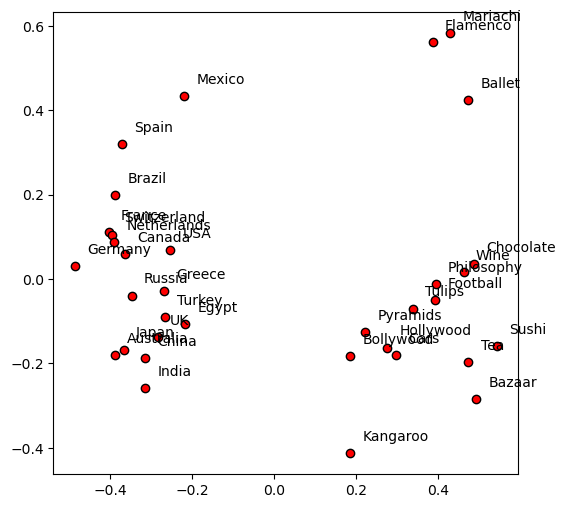

In [40]:
# Please write your Python code below and execute it.

# Google News Model
display_scatterplot(wv_model, words_in_vocab_google)

In [41]:
# Please write your Python code below and execute it.
# Text8 Model
# display_scatterplot(my_model_wv, words_in_vocab_text8)

"Can't work because no words are in the vocabulary of the text8 model"

"Can't work because no words are in the vocabulary of the text8 model"

## End of Lab 6
Please make sure all cells have been executed, save this completed notebook, compress it to a *zip* file, and upload it to [Moodle](https://moodle.msengineering.ch/course/view.php?id=1869).